In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from math import *
import scipy
from scipy.constants import *
from scipy.stats import linregress



Wavelength of RF:   15.4771532266
Size of Engine gap: 22.7
Ratio:              0.681812917473
Rounding to 2/3rds for simplicity.



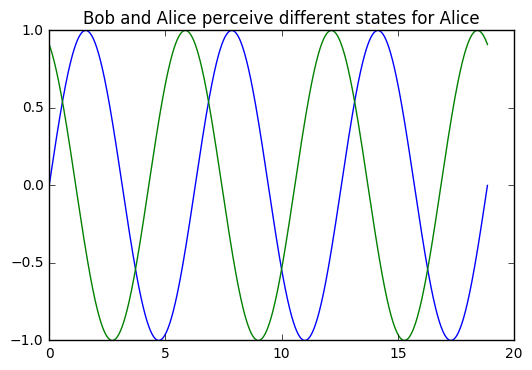

In [2]:
frequency_mhz = 1937
wavelength_cm = speed_of_light / frequency_mhz / 1000 / 1000 * 100
engine_gap_cm = 22.7
print "Wavelength of RF:  ", wavelength_cm
print "Size of Engine gap:", engine_gap_cm
print "Ratio:             ", wavelength_cm / engine_gap_cm

print "Rounding to 2/3rds for simplicity.\n"

normalized_delay = wavelength_cm / engine_gap_cm
normalized_delay *= np.pi*2
depth=7500
x = np.linspace(0, 6*np.pi, depth)

alice_ref = {}
bob_ref = {}

alice_ref['alice'] = np.sin(x)
alice_delayed = x - normalized_delay
bob_ref['alice']   = np.sin(alice_delayed)

plt.plot(x, alice_ref['alice'])
plt.plot(x, bob_ref['alice'])


plt.title('Bob and Alice perceive different states for Alice');




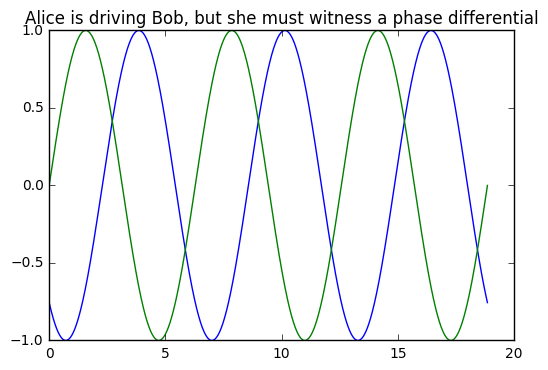

In [3]:
bob_ref['bob']   = bob_ref['alice'] #let's assume this is instantaneous

bob_delayed = alice_delayed - (normalized_delay)
alice_ref['bob']   = np.sin(bob_delayed)

plt.plot(x, alice_ref['bob'])
plt.plot(x, alice_ref['alice'])
plt.title('Alice is driving Bob, but she must witness a phase differential');


0.827405368437 0.827405368437 0.827405368437 0.827405368437


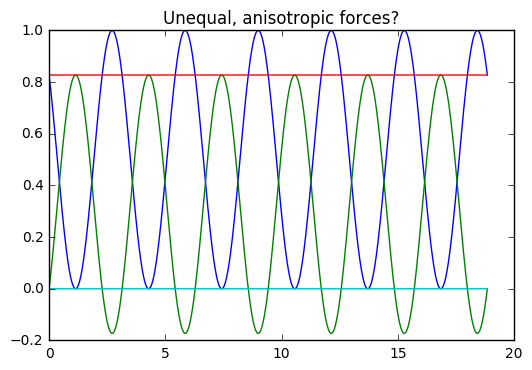

In [4]:
# trying to go from attract/repel to an actual direction.  repelling for alice is the direction of attraction for bob
def calculate_repel_force(frame):
    force = frame['alice'] * frame['bob']
    # not modeling permeability, and radius is considered 1 since we're in normalized space
    #force /= (4*np.pi)
    return force

alice_force   =  -calculate_repel_force(alice_ref) 
bob_force     =  calculate_repel_force(bob_ref)

plt.plot(x, bob_force)
plt.plot(x, alice_force)
vec = bob_force + alice_force
plt.plot(x,vec)
plt.plot(x, np.zeros(shape=vec.shape[0]))
plt.title('Unequal, anisotropic forces?');
print np.average(vec), np.max(vec), np.min(vec), np.sum(vec)/depth
